# Mobile Device Usage Case Study

### Data Extraction and Cleaning  
This project analyzes mobile device usage based on the *User Behavior Dataset*.  

**Business Task:**  
Understand how mobile users interact with their devices and prepare the dataset for analysis.

**Dataset Source:**  
Gigsheet – Mobile Device Usage and User Behavior Dataset.

In this notebook, we will start with:  
1. Import dependencies  
2. Load the dataset  
3. Inspect the structure  
4. Clean invalid or missing data  
5. Prepare the dataset for deeper analysis


In [1]:
# Import core libraries
import pandas as pd
import numpy as np

# Display settings
pd.set_option('display.max_columns', None)


## Loading the Dataset  
The CSV file is stored in the `sample_data` folder in this Colab environment.  
We read the dataset into a dataframe called `device_usage`.


In [4]:
# Load dataset
file_path = "/content/sample_data/user_behavior_dataset.csv"
device_usage = pd.read_csv(file_path)

# Preview the dataset
device_usage.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


## Inspecting the Dataset  
We now check:  
- First few rows  
- Column names  
- Data types  
- Shape of the dataset


In [5]:
print("First 6 rows:")
display(device_usage.head())

print("\nColumn names:")
print(device_usage.columns.tolist())

print("\nData types:")
print(device_usage.dtypes)

print("\nDataset shape:")
print(device_usage.shape)

First 6 rows:


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3



Column names:
['User ID', 'Device Model', 'Operating System', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class']

Data types:
User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

Dataset shape:
(700, 11)


## Checking for Duplicates, Typos, and Invalid Values  
We ensure the dataset has no:  
- Duplicate users  
- Typos in categorical fields  
- Impossible numeric values  


In [6]:
duplicate_count = device_usage["User ID"].duplicated().sum()
print("Number of duplicate User IDs:", duplicate_count)

Number of duplicate User IDs: 0


In [7]:
print("\nDevice Model counts:")
print(device_usage["Device Model"].value_counts())

print("\nOperating System counts:")
print(device_usage["Operating System"].value_counts())

print("\nGender counts:")
print(device_usage["Gender"].value_counts())


Device Model counts:
Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

Operating System counts:
Operating System
Android    554
iOS        146
Name: count, dtype: int64

Gender counts:
Gender
Male      364
Female    336
Name: count, dtype: int64


In [8]:
numeric_columns = [
    "App Usage Time (min/day)",
    "Screen On Time (hours/day)",
    "Battery Drain (mAh/day)",
    "Number of Apps Installed",
    "Data Usage (MB/day)",
    "Age",
    "User Behavior Class"
]

# 1. Values must be non-negative
for col in numeric_columns:
    invalid_negative = device_usage[device_usage[col] < 0]
    print(f"Negative values in '{col}':", len(invalid_negative))


# 2. User Behavior Class must be whole numbers 1–5
invalid_behavior = device_usage[
    (device_usage["User Behavior Class"] < 1) |
    (device_usage["User Behavior Class"] > 5) |
    (device_usage["User Behavior Class"] % 1 != 0)
]
print("\nInvalid User Behavior Class values:", len(invalid_behavior))


# 3. App Usage Time must not exceed 24 * 60 minutes
invalid_app_usage = device_usage[
    device_usage["App Usage Time (min/day)"] > 1440
]
print("Invalid App Usage Time (> 1440 min/day):", len(invalid_app_usage))


# 4. Screen On Time must not exceed 24 hours
invalid_screen_time = device_usage[
    device_usage["Screen On Time (hours/day)"] > 24
]
print("Invalid Screen On Time (> 24 hours):", len(invalid_screen_time))

Negative values in 'App Usage Time (min/day)': 0
Negative values in 'Screen On Time (hours/day)': 0
Negative values in 'Battery Drain (mAh/day)': 0
Negative values in 'Number of Apps Installed': 0
Negative values in 'Data Usage (MB/day)': 0
Negative values in 'Age': 0
Negative values in 'User Behavior Class': 0

Invalid User Behavior Class values: 0
Invalid App Usage Time (> 1440 min/day): 0
Invalid Screen On Time (> 24 hours): 0


## Cleaning the Dataset  
We remove:  
- Null values  
- Out-of-range age values  
- Negative or impossible data points  


In [9]:
print("Missing values before cleaning:")
print(device_usage.isna().sum())

# remove rows with missing values
device_usage = device_usage.dropna()

print("\nMissing values after cleaning:")
print(device_usage.isna().sum())

Missing values before cleaning:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

Missing values after cleaning:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


# Final Cleaned Dataset  
The dataframe is now cleaned and ready for analysis.  
Below is the shape and preview of the final dataset.


In [10]:
print("Final dataset shape:", device_usage.shape)
device_usage.head()

Final dataset shape: (700, 11)


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


# EDA SECTION

In [11]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook aesthetics
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8")

## A. DEMOGRAPHIC PATTERNS


###  Insight: Age Distribution of Users
The dataset contains users from a wide age range, with a strong concentration between ages 18 and 40.  
This indicates that the dataset is primarily composed of younger and working-age individuals, which may influence overall usage patterns.  
The distribution appears fairly uniform within this range, with fewer users beyond age 60.


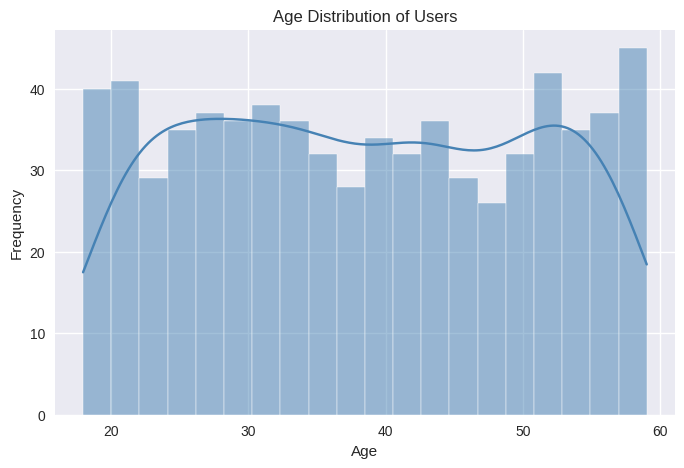

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(device_usage["Age"], bins=20, kde=True, color="steelblue")
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Insight: Gender Distribution
The gender split is nearly balanced, with a slight male majority.  
This balance ensures that comparisons between male and female usage patterns will not be heavily biased by sample size.

/tmp/ipython-input-2767064443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=device_usage, palette="Set2")


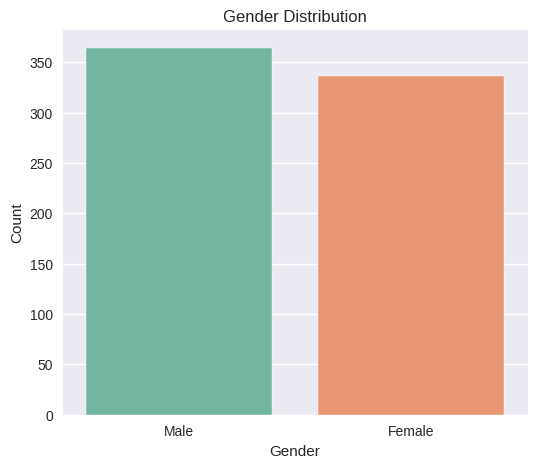

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x="Gender", data=device_usage, palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### Insight: Age vs. Screen-On Time


There is a clear downward trend in screen time as age increases.  
Younger users (teens and early 20s) tend to spend significantly more hours per day on their devices.  
Screen time steadily decreases for users above age 40.  
This suggests that younger demographics contribute more heavily to intensive device usage and may drive high battery drain and data consumption behaviors.

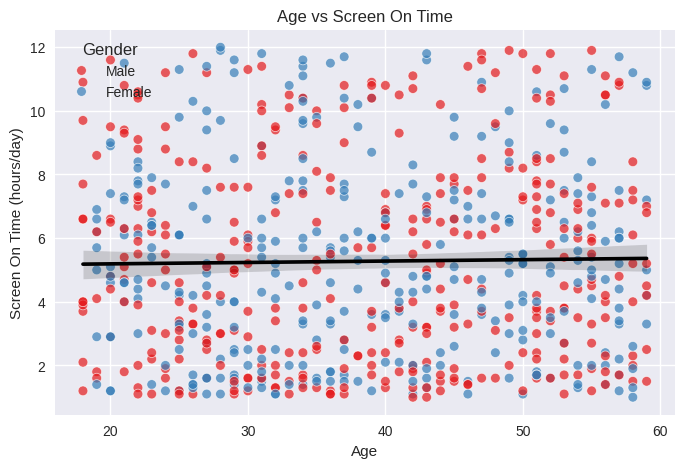

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="Age",
    y="Screen On Time (hours/day)",
    data=device_usage,
    hue="Gender",
    palette="Set1",
    alpha=0.7
)
sns.regplot(
    x="Age",
    y="Screen On Time (hours/day)",
    data=device_usage,
    scatter=False,
    color="black"
)
plt.title("Age vs Screen On Time")
plt.xlabel("Age")
plt.ylabel("Screen On Time (hours/day)")
plt.show()

### Insight: Screen-On Time by Gender
Both genders show similar variability in screen-on time, but the median usage is slightly higher among females.  
This suggests that gender does not dramatically impact screen-on behavior, although small differences exist.  
The similarity indicates that demographic differences in device usage are more age-driven than gender-driven.


/tmp/ipython-input-968308700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


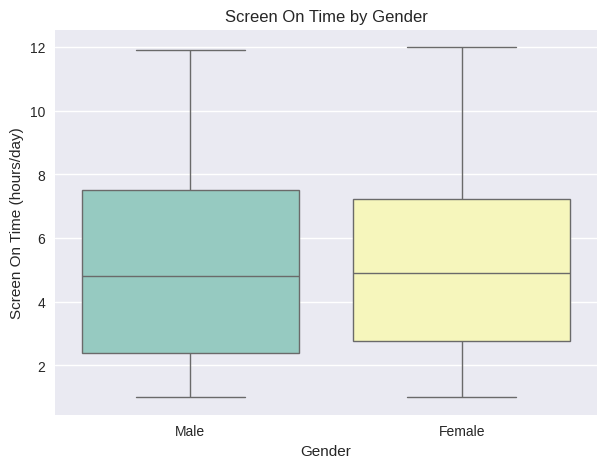

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x="Gender",
    y="Screen On Time (hours/day)",
    data=device_usage,
    palette="Set3"
)
plt.title("Screen On Time by Gender")
plt.xlabel("Gender")
plt.ylabel("Screen On Time (hours/day)")
plt.show()

## B. DEVICE OS & BEHAVIOUR

###  Insight: Device Model Frequency
The dataset includes five major smartphone models with relatively even representation.  
This balanced distribution ensures that comparisons across device types are fair and not dominated by any single model.  
Devices include a mix of Android flagships (Samsung, OnePlus, Xiaomi, Pixel) and iPhone 12.


/tmp/ipython-input-1641415950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


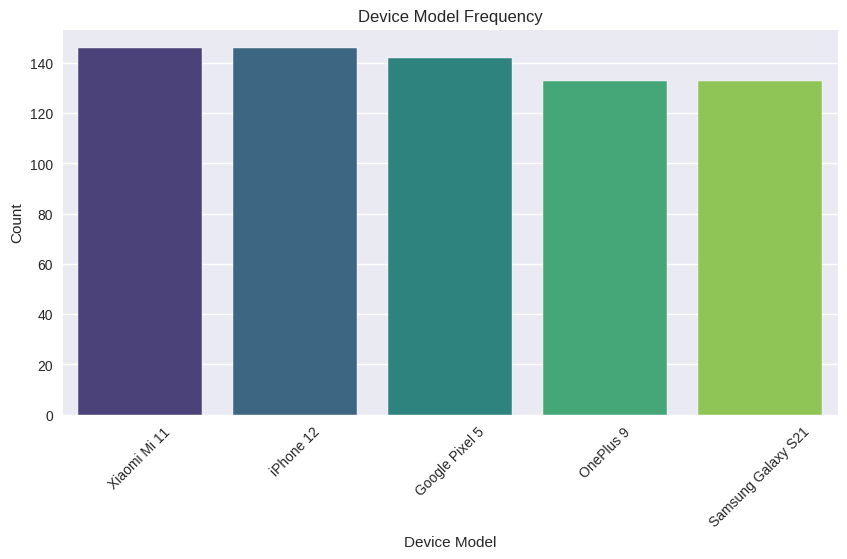

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(
    x="Device Model",
    data=device_usage,
    order=device_usage["Device Model"].value_counts().index,
    palette="viridis"
)
plt.title("Device Model Frequency")
plt.xlabel("Device Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Insight: Operating System Distribution
Android users make up a large majority of the dataset (~79%), while iOS users account for the remaining ~21%.  
This reflects real-world global smartphone market dynamics, where Android has a larger share.  
It also means behavioral patterns discovered in this dataset may lean toward Android-heavy usage habits.


/tmp/ipython-input-2739344254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Operating System", data=device_usage, palette="coolwarm")


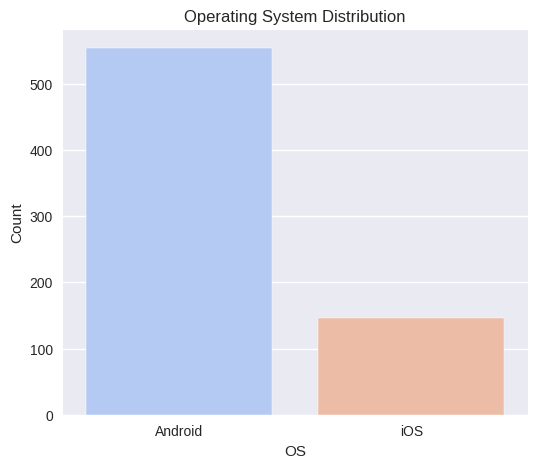

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x="Operating System", data=device_usage, palette="coolwarm")
plt.title("Operating System Distribution")
plt.xlabel("OS")
plt.ylabel("Count")
plt.show()

### Insight: Screen-On Time Across OS
Android users display slightly higher screen-on time on average compared to iOS users.  
This may reflect differences in device ecosystems, app availability, or user habits.  
The distribution spread also suggests that Android users have more variability in screen engagement.


/tmp/ipython-input-467555201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


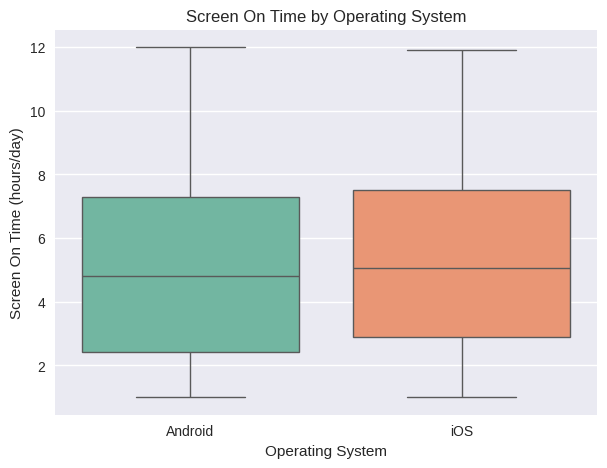

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(
    x="Operating System",
    y="Screen On Time (hours/day)",
    data=device_usage,
    palette="Set2"
)
plt.title("Screen On Time by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Screen On Time (hours/day)")
plt.show()

### Insight: Battery Drain by Device Model
Battery drain varies noticeably across device models.  
Some Android devices show higher daily mAh consumption, likely due to hardware efficiency or heavier usage patterns.  
This highlights that device type plays a role in energy consumption, independent of user behavior.


/tmp/ipython-input-1778998154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


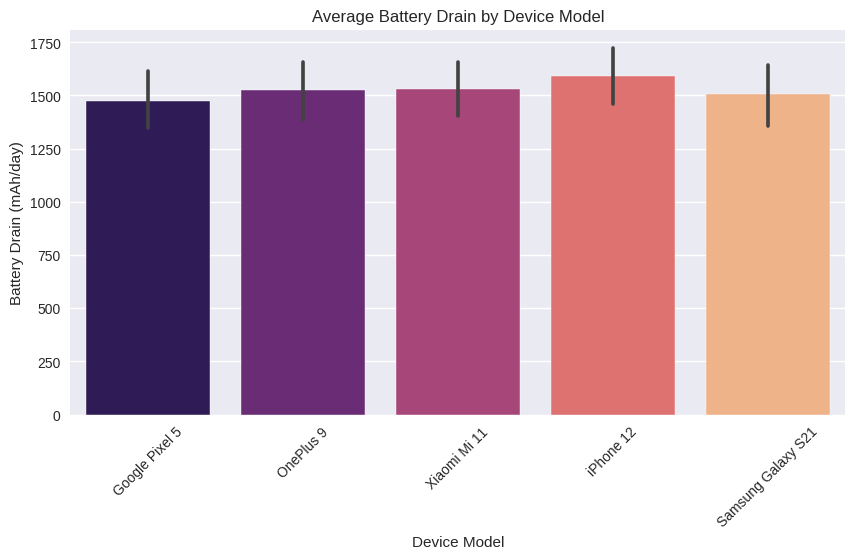

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    x="Device Model",
    y="Battery Drain (mAh/day)",
    data=device_usage,
    estimator=np.mean,
    palette="magma"
)
plt.title("Average Battery Drain by Device Model")
plt.xlabel("Device Model")
plt.ylabel("Battery Drain (mAh/day)")
plt.xticks(rotation=45)
plt.show()

### Insight: Data Usage by Device Model
Different device models exhibit distinct data consumption profiles.  
This may be due to hardware differences, user demographics tied to each device, or app usage behaviors.  
Overall, certain models appear to be associated with more data-heavy users, which could signal streaming/gaming-focused usage patterns.

/tmp/ipython-input-2584752643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


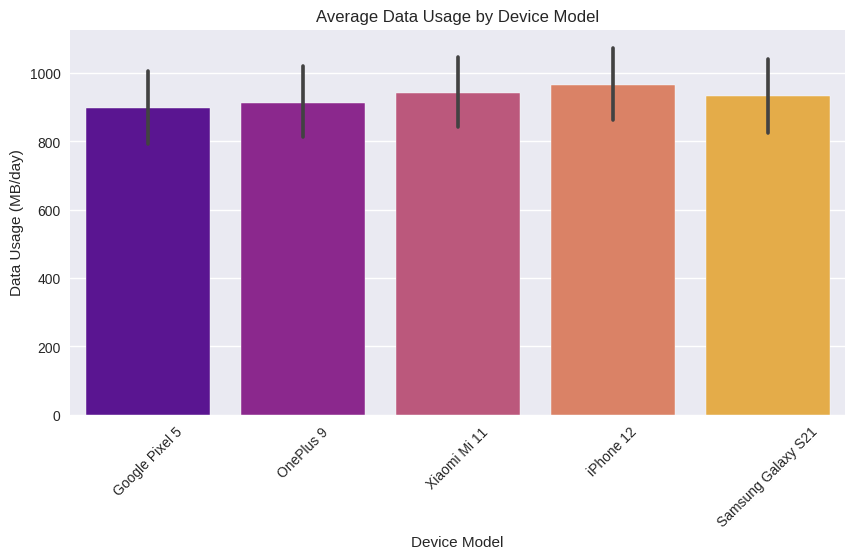

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(
    x="Device Model",
    y="Data Usage (MB/day)",
    data=device_usage,
    estimator=np.mean,
    palette="plasma"
)
plt.title("Average Data Usage by Device Model")
plt.xlabel("Device Model")
plt.ylabel("Data Usage (MB/day)")
plt.xticks(rotation=45)
plt.show()

## Cleaning the Dataset  
We remove:  
- Null values  
- Out-of-range age values  
- Negative or impossible data points  


# Visualizing and Analyzing Features and Feature Relationships


## C. Usage Distributions: Summary Statistics
Before looking into how these features look and interact visually we should look into their distributions. Our group defines usage variables: Screen On Time (hours/day),App Usage Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, Data Usage (MB/day).

The distributions here help us understand whats typical or normal for the average users, which in turns help drive how we define "high usage" users.

The statistics we will look into are mean, standard deviation, minimum, maximum, (25th, 50th, 75th)percentiles, interquartile range (IQR) and skew.



In [12]:
# looking at some of the usage columns
usage_cols = [
    "Screen On Time (hours/day)",
    "App Usage Time (min/day)",
    "Battery Drain (mAh/day)",
    "Number of Apps Installed",
    "Data Usage (MB/day)"
]

# basic stats for each of these
usage_summary = device_usage[usage_cols].describe(
    percentiles=[0.25, 0.5, 0.75]
).T

# IQR
usage_summary["IQR"] = usage_summary["75%"] - usage_summary["25%"]

# skew
usage_summary["Skew"] = device_usage[usage_cols].skew()

usage_summary

,count,mean,std,min,25%,50%,75%,max,IQR,Skew
Screen On Time (hours/day),700.0,5.272714,3.068584,1.0,2.50,4.9,7.40,12.0,4.90,0.459992
App Usage Time (min/day),700.0,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0,321.00,0.372312
Battery Drain (mAh/day),700.0,1525.158571,819.136414,302.0,722.25,1502.5,2229.50,2993.0,1507.25,0.134559
Number of Apps Installed,700.0,50.681429,26.943324,10.0,26.00,49.0,74.00,99.0,48.00,0.111733
Data Usage (MB/day),700.0,929.742857,640.451729,102.0,373.00,823.5,1341.00,2497.0,968.00,0.699264


The usage features have a large range across the 700 users. Screen On Time averages 5.27 hours/day, and its large IQR (4.9 hours) meaning that a "normal" user could range widely from very small to large daily usage, making it hard to define whats "normal". App Usage Time shows a similar pattern, with an average of 271 minutes/day and a wide IQR (321 minutes), meaning again theres varied engagement across the sample. Battery Drain has the largest spread (IQR 1507 mAh), showing how different users treat their phones. Unlike the other features, the Number of Apps Installed is more stable, at about 50 apps. Overall, these statistics show that while there are light users, the wide IQRs and slight skew righ suggests that there are high usage groups. This section helps see how we quanitfy heavier users down the line and which relationships we want to investigate and visualize.

### Visualizing Usage Distributions
Here we want to plot histograms (with KDE curves) to help reveal patterns like skew, tails, clusters of users, and ranges of activity. These visuals help us know what relationships between features that could be a good indication of high-usage.

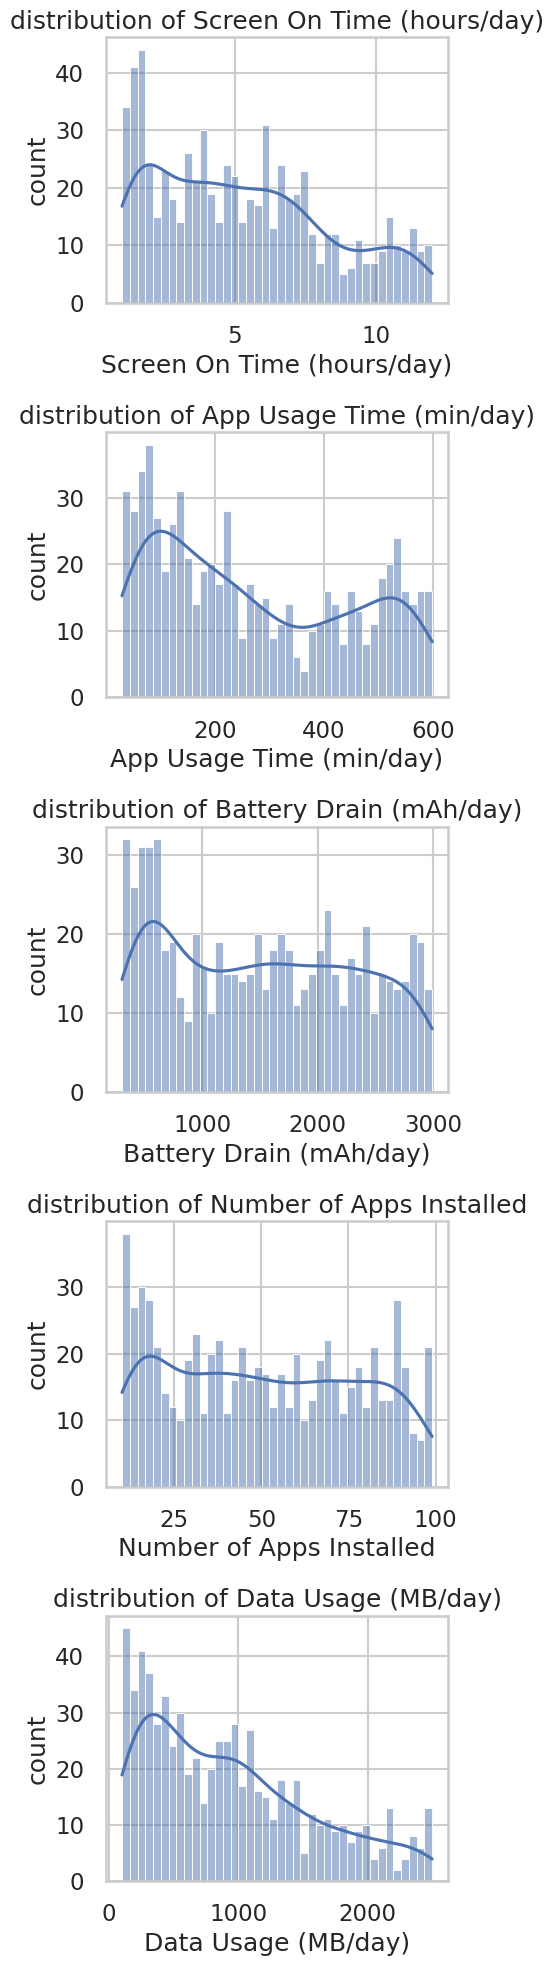

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="talk")

# making a one plot for each usage column
fig, axes = plt.subplots(5, 1, figsize=(5, 20))
for ax, col in zip(axes, usage_cols):
    # histogram + kde
    sns.histplot(device_usage[col], kde=True, ax=ax, bins=40)
    # adding labels onto plots
    ax.set_title(f"distribution of {col}")
    ax.set_ylabel("count")
    ax.set_xlabel(col)
plt.tight_layout()
plt.show()

Here are observations on the distributions:

*   Most users are in average usage ranges, but all of the features show a clear right tail of heavier users.
*   Screen time and app usage both show have spreads, so there is a large variation in patterns   
*   Battery drain and data usage have the strongest tails right, meaning there is a noticeable group of users who use their devices to the extremes.
*   Number of apps installed is more balanced indicating it might not be helpful to "learning" down the line.


### Outlier Investigation with Boxplots
We will use boxplots to visualize the spread of each use feature but this stands out from previous vizualizations as it helps us identify potential outliers. Boxplots show us the median, IQR and min/max values. These outliers points represent users with unusual activity, making them good indicators of heavy-usage. These extremes here help us see again which features have high-usage patterns.


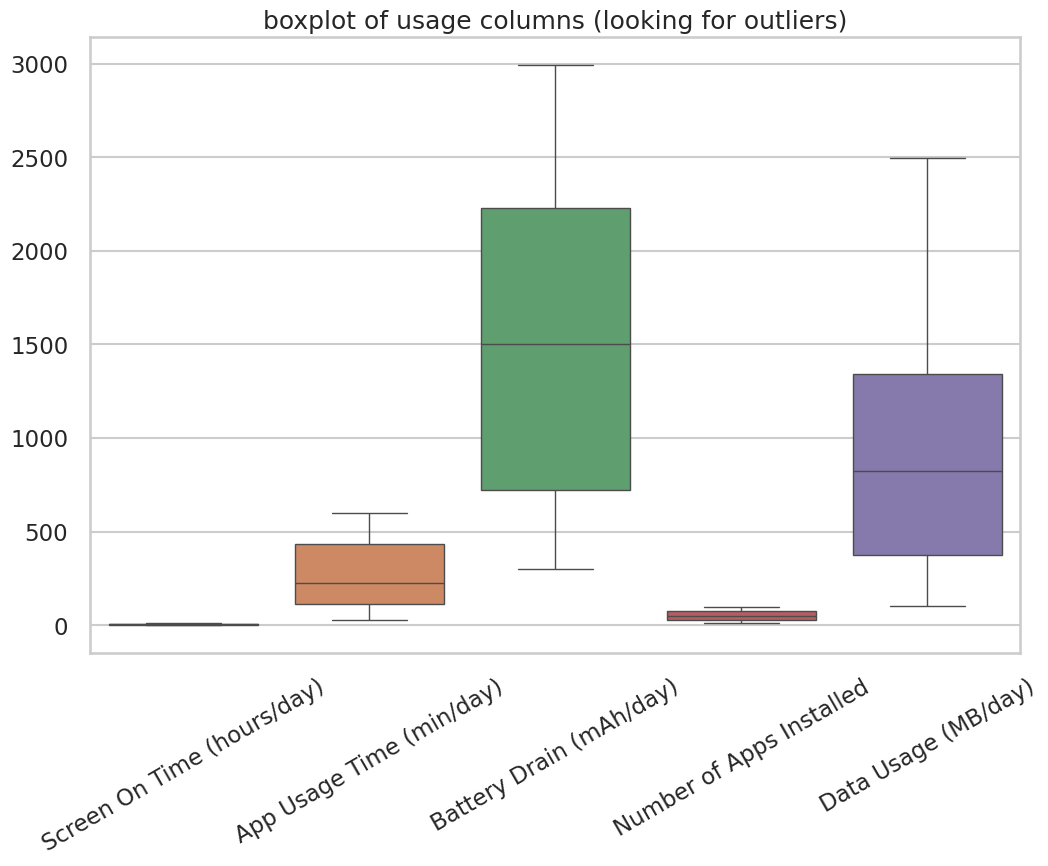

In [14]:
# boxplot to see outliers in the usage data
plt.figure(figsize=(12,8))
sns.boxplot(data=device_usage[usage_cols])

plt.title("boxplot of usage columns (looking for outliers)")
plt.xticks(rotation=30)
plt.show()

The boxplot mainly helps us confirm what we suspected, the outliers are across each of the usage metrics. We can clearly see that each feature has users who sit higher than the normal range, especially in Battery Drain and Data Usage. These outliers are the users with very heavy behavior, and they’re the ones we’ll pay attention to in the relationship analysis. We want to understand what drives their high usage and what can help us predict high usage

### Using Percentile Based Thresholds
We look at the 75th and 90th percentiles to get potential cutoff points for what counts as higher-than-normal usage for each category. These thresholds give us boundaries we can use later for the predictive modeling when defining heavy users or overuse markers.

In [15]:
thresholds = device_usage[usage_cols].quantile([0.75, 0.90]).T
thresholds.columns = ["75th percentile", "90th percentile"]
thresholds

,75th percentile,90th percentile
Screen On Time (hours/day),7.40,10.2
App Usage Time (min/day),434.25,539.0
Battery Drain (mAh/day),2229.50,2711.1
Number of Apps Installed,74.00,89.0
Data Usage (MB/day),1341.00,1924.4


## D. Scatterplot of Feature Relationships

Based on what we saw in the earlier analysis and visualizations some features appear to move together to reflect related trends in phone behavior. We focus on four relationships that are shown by the earlier insights:

- Screen Time vs. Battery Drain: Longer screen time is a potential cause of power use, so we expect a positive relationship

- App Usage Time vs. Data Usage: Many popular apps (social media, streaming, messaging) use data at higher rates.

- Number of Apps Installed vs. Screen Time: Users with many apps may user their device more frequently, so we will check whether app count translates into higher daily usage.

- Age vs. Number of Apps Installed: Younger users often install more apps and are percieved to use their phones more, while older users may be more reluctant; examining this trend helps us understand if app counts follow age patterns.



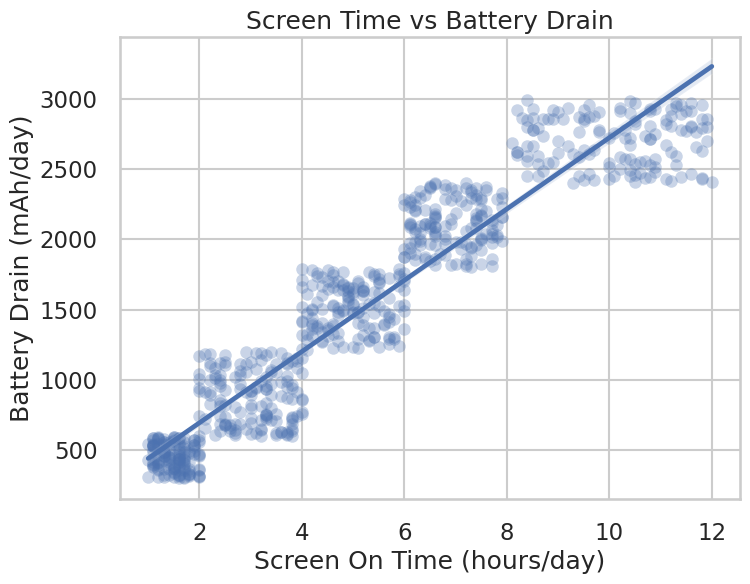

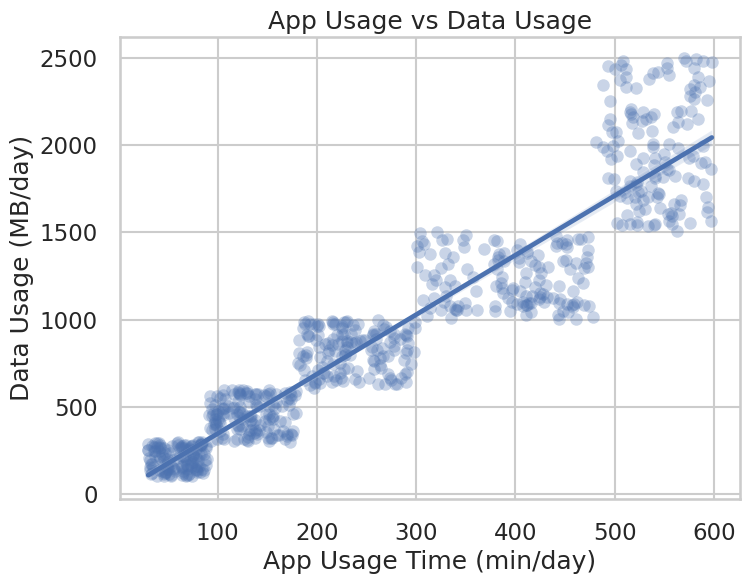

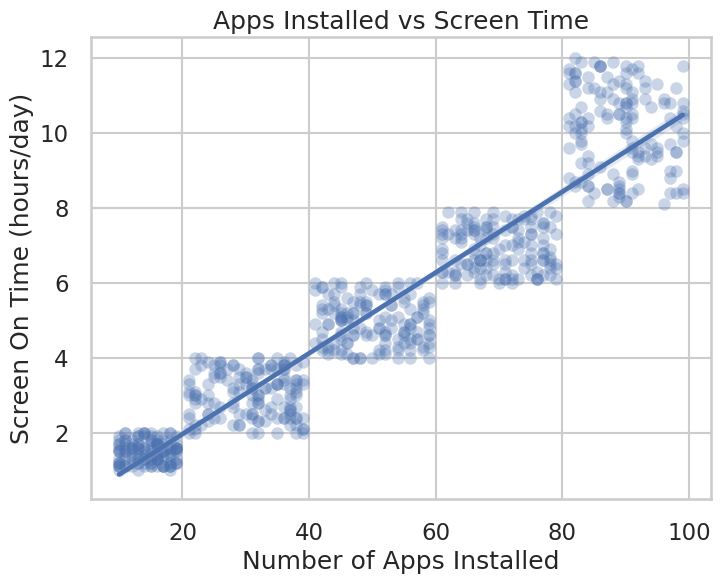

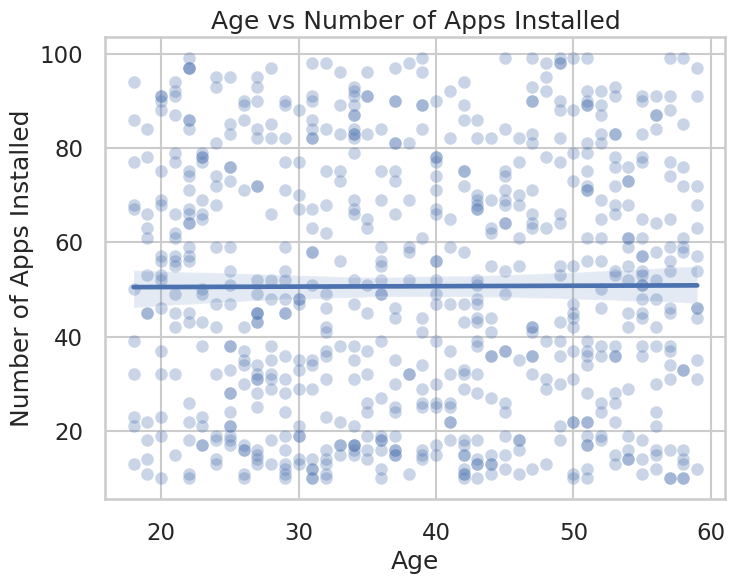

In [16]:
# trying out some simple regression plots to see how features relate

# Screen time vs battery drain
plt.figure(figsize=(8,6))
sns.regplot(
    data=device_usage,
    x="Screen On Time (hours/day)",
    y="Battery Drain (mAh/day)",
    scatter_kws={"alpha": 0.3}
)
plt.title("Screen Time vs Battery Drain")
plt.show()


# App usage vs data usage (expecting these to be related)
plt.figure(figsize=(8,6))
sns.regplot(
    data=device_usage,
    x="App Usage Time (min/day)",
    y="Data Usage (MB/day)",
    scatter_kws={"alpha": 0.3}
)
plt.title("App Usage vs Data Usage")
plt.show()


# do people with more apps spend more time on their phone?
plt.figure(figsize=(8,6))
sns.regplot(
    data=device_usage,
    x="Number of Apps Installed",
    y="Screen On Time (hours/day)",
    scatter_kws={"alpha": 0.3}
)
plt.title("Apps Installed vs Screen Time")
plt.show()


# Checking if older users install fewer apps
plt.figure(figsize=(8,6))
sns.regplot(
    data=device_usage,
    x="Age",
    y="Number of Apps Installed",
    scatter_kws={"alpha": 0.3}
)
plt.title("Age vs Number of Apps Installed")
plt.show()


Takeaways

*   App Usage vs Data Usage: There is a linear relationship meaning as app usage increases as does data usage. This confirms that heavier app usage directly translates to higher data usage.

*   Screen Time vs Battery Drain: Screen time is highly correlated with battery drain. Users who have higher screen time consistently had higher power consumption.


*   App Count vs Screen Time: There is once again a postive trend where users with more apps tend to spend more time on their devices. This supports the idea that users who have more apps engage more frequently with their phones and for longer durations.


*   Age vs Apps Count: This stands out as there is no meaningful relationship in the plot. App count remains the same across ages, meaning that installations are not age-dependent in this set.

In [17]:
# checking how strongly each pair of variables is related, not visually

pair1 = device_usage[["App Usage Time (min/day)", "Data Usage (MB/day)"]].corr().iloc[0,1]
pair2 = device_usage[["Screen On Time (hours/day)", "Battery Drain (mAh/day)"]].corr().iloc[0,1]
pair3 = device_usage[["Number of Apps Installed", "Screen On Time (hours/day)"]].corr().iloc[0,1]
pair4 = device_usage[["Age", "Number of Apps Installed"]].corr().iloc[0,1]

partial_corr_df = pd.DataFrame({
    "features": [
        "App Usage vs Data Usage",
        "Screen Time vs Battery Drain",
        "App Count vs Screen Time",
        "Age vs App Count"
    ],
    "corr": [pair1, pair2, pair3, pair4]
})

partial_corr_df

,features,corr
0,App Usage vs Data Usage,0.942308
1,Screen Time vs Battery Drain,0.948983
2,App Count vs Screen Time,0.946975
3,Age vs App Count,0.004034


The correlation df confirms what we saw earlier in the scatterplots: the first three pairs all correlate strongly, while age vs app count show no relationship.


## Exploring Potential High-Usage Definitions

Since Data Usage and Battery Drain showed the widest spreads in our earlier analysis, one way to explore potential heavy-use patterns is to look at users above the high percentiles for these columns. This isn’t a final definition of “high usage,” but it gives us a simple way to visualize how users cluster based on data engagement and battery consumption. The segments (“high,” “lower,” and “mixed”) help us get an sense of where heavier users might be in the overall population based off of these features.

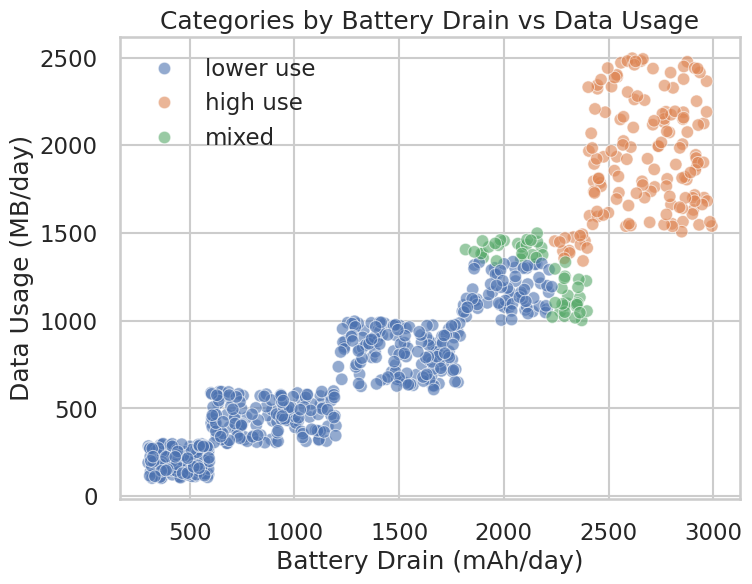

In [18]:
# using the 75th percentile as a cutoff for "high use"
battery_75 = device_usage["Battery Drain (mAh/day)"].quantile(0.75)
data_75 = device_usage["Data Usage (MB/day)"].quantile(0.75)

# label each user (like categories) of high use for one or both or neither
def usage_label(row):
    bat = row["Battery Drain (mAh/day)"]
    dat = row["Data Usage (MB/day)"]

    # top 25% in BOTH battery drain + data usage
    if bat >= battery_75 and dat >= data_75:
        return "high use"
    # below both thresholds == likely lighter users
    elif bat < battery_75 and dat < data_75:
        return "lower use"
    # anything else is probably mixed behavior
    else:
        return "mixed"

device_usage["usage"] = device_usage.apply(usage_label, axis=1)

# plotting to visualize if clustering is a good approach
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=device_usage,
    x="Battery Drain (mAh/day)",
    y="Data Usage (MB/day)",
    hue="usage",
    alpha=0.6
)

plt.title("Categories by Battery Drain vs Data Usage")
plt.legend()
plt.show()


## E. Correlation Heat Map

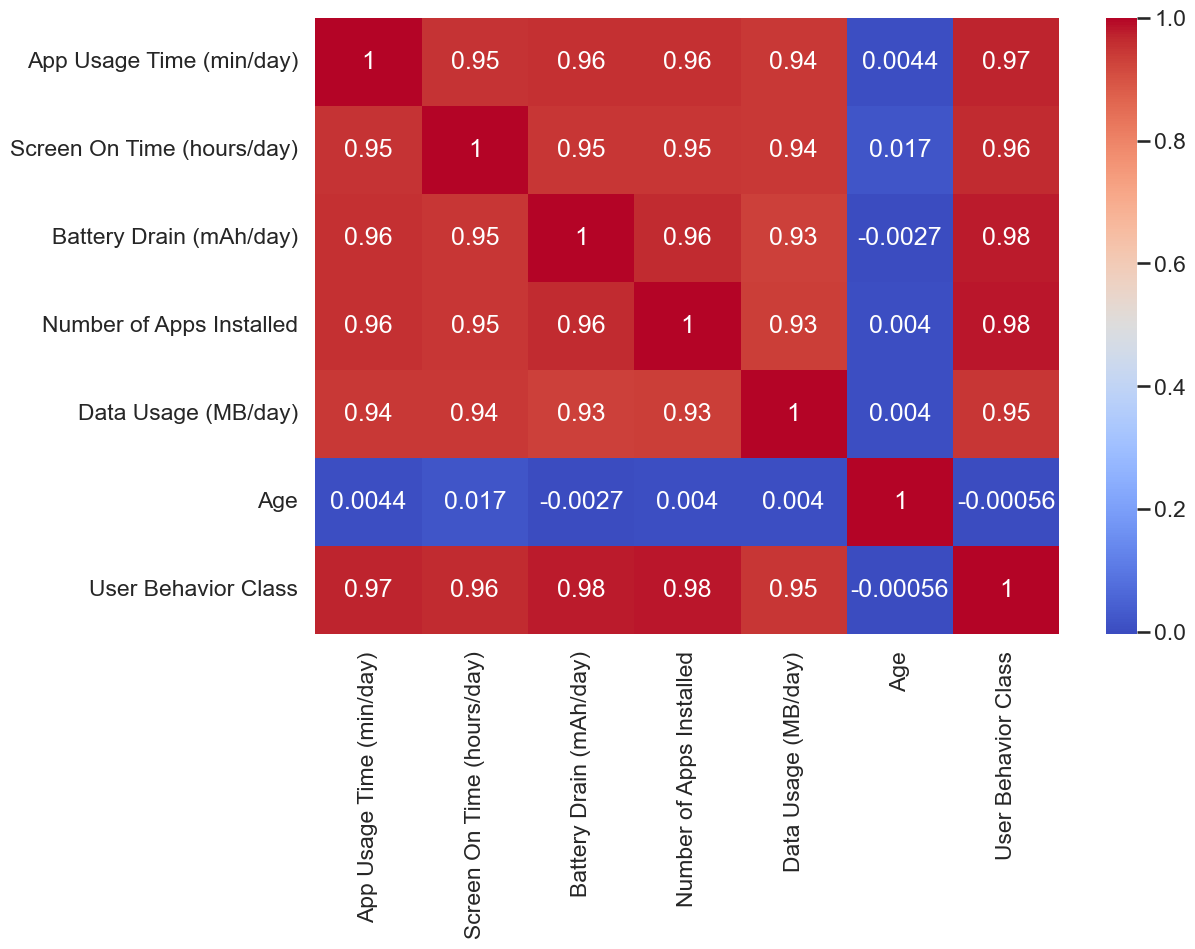

In [ ]:
path_to_cleaned = "../data/user_behavior_dataset.csv"
df = pd.read_csv(path_to_cleaned)
NUMERIC_COLUMNS = [
	"App Usage Time (min/day)",
	"Screen On Time (hours/day)",
	"Battery Drain (mAh/day)",
	"Number of Apps Installed",
	"Data Usage (MB/day)",
	"Age",
	"User Behavior Class",
]
num_df = df[NUMERIC_COLUMNS]
corr = num_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


* Strong correlations among App Usage Time, Screen On time, Battery Drain, Apps Installed, User Behavior Class and Data Usage.
* These is probably due to them all being related to high deceive activity.
* Age shows near zero correlation between other numerical variables.


## F. Persona Summary

In [ ]:
persona_stats = df.drop(['User ID'], axis=1).groupby('User Behavior Class').mean(numeric_only=True)
persona_stats

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
User Behavior Class,,,,,,
1,60.426471,1.490441,454.977941,14.558824,202.323529,38.213235
2,131.972603,3.037671,883.808219,30.753425,451.417808,38.643836
3,235.398601,4.955944,1515.055944,50.000000,822.013986,38.678322
4,395.748201,6.909353,2105.805755,69.920863,1232.230216,38.676259
5,541.419118,10.114706,2701.014706,89.250000,1974.772059,38.176471


* All variables increases as we go up the User Behavior Class.
* Age remains constant around 38 confirming that age doesn't help in identifying at risk user.

# Visualizations for ML Clustering and Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

random_state = 42

%matplotlib inline

In [ ]:
path_to_cleaned = "../data/user_behavior_dataset.csv"
df = pd.read_csv(path_to_cleaned)

Using Clustering Algorithms


In [ ]:
feature_cols = ["App Usage Time (min/day)", "Screen On Time (hours/day)", "Battery Drain (mAh/day)", "Number of Apps Installed", "Data Usage (MB/day)"]

X = df[feature_cols] #X is used for convention and here we are taking these columns as features to categorize how heavy/light a user is.

# Keep copy of original dataset to add clustering output (y values) and then visualize the clustering based on the cluster it falls into
df_clust = df.loc[X.index].copy()

In [ ]:
#Performing scaling (standard scaler does x - u / sigma where u is mean and sigma is standard deviation). Good practice to avoid outlies
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

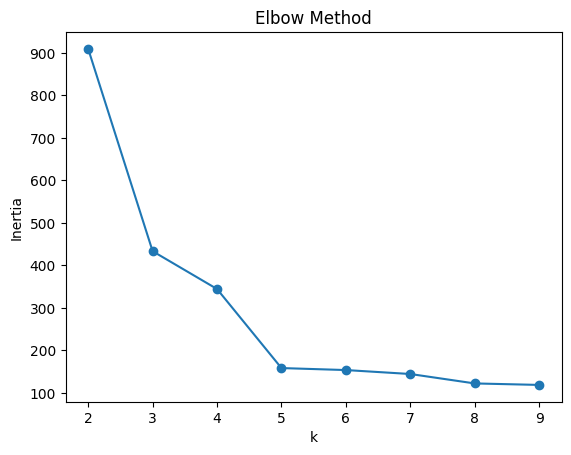

In [ ]:
#Using elbow method to get the best k value for our task by training on the training data
inertias = [] #Within-Cluster Sum of Squares is also called as inertia
k_values = range(2, 10)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=random_state, n_init="auto")
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [ ]:
best_k = 5 #From above plot

km = KMeans(n_clusters=best_k, random_state=random_state) #Training it with the best k value
y = km.fit_predict(X_scaled) #This is used to get category output values (i.e. y in supervised learning)

df_clust["category"] = y #Assigning which user falls into which category or cluster
print(df_clust)

     User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh

In [ ]:
category_details = df_clust.groupby("category")[feature_cols].mean()
category_details
#This table gives a clear insight of the cluster/category and how it is able to differentate people (mean is the statistic used here)
#3 light user, 1 moderate user, 2 heavy user, 4 very heavy user, 0 extreme user (based on all features, it is evident)

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day)
category,,,,,
0,541.419118,10.114706,2701.014706,89.250000,1974.772059
1,131.972603,3.037671,883.808219,30.753425,451.417808
2,235.398601,4.955944,1515.055944,50.000000,822.013986
3,60.426471,1.490441,454.977941,14.558824,202.323529
4,395.748201,6.909353,2105.805755,69.920863,1232.230216


In [ ]:
#Lets grab the clusters and now try to get the categories as mentioned above so that we can read the plot!
sorted_categories = category_details["Screen On Time (hours/day)"].sort_values().index.tolist()

type_of_user = ["Light User", "Moderate User", "Heavy User", "Very Heavy User", "Extreme User"] #creating a list of names to zip it with category

category_to_label = {}  # Create empty dictionary to map category to the label

for category_id, label in zip(sorted_categories, type_of_user):
    category_to_label[category_id] = label

df_clust["Type of User"] = df_clust["category"].map(category_to_label)

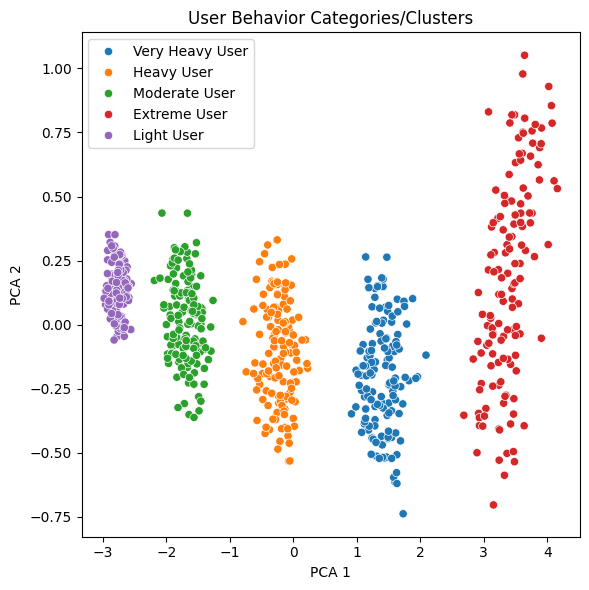

In [ ]:
from sklearn.decomposition import PCA
'''
Now trying to plot this on a 2d plot so hence we need to extract features. For this, Principal Component Analysis is a great way
original data -> 5 features ("App Usage Time (min/day)", "Screen On Time (hours/day)", "Battery Drain (mAh/day)",
"Number of Apps Installed", "Data Usage (MB/day)") becomes 2D (PCA1 and PCA2 which captures maximum variance)
'''

pca = PCA(n_components=2, random_state=random_state)
X_pca = pca.fit_transform(X_scaled)

df_clust["pca1"] = X_pca[:, 0]
df_clust["pca2"] = X_pca[:, 1]

plt.figure(figsize=(6,6))
sns.scatterplot(data=df_clust, x="pca1", y="pca2", hue="Type of User")

plt.title("User Behavior Categories/Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.tight_layout()
plt.show()

'''
Regression Random Forests
'''

Device health/battery impact patterns

In [ ]:
#Taking battery drain as a target to understand how battery drains based on numeric and categorical features (one hot encoded)
target_col = "Battery Drain (mAh/day)"

numeric_features = ["App Usage Time (min/day)", "Screen On Time (hours/day)", "Data Usage (MB/day)", "Number of Apps Installed", "Age"]

categorical_features = ["Device Model", "Operating System", "Gender"]

#Creating input and output (battery drain is what we need to predict, hence it is output)
X = df[numeric_features + categorical_features].copy()
y = df[target_col].copy()


In [ ]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

rf = RandomForestRegressor(n_estimators=300, random_state=random_state)

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("rf", rf)
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['App Usage Time (min/day)',
                                                   'Screen On Time (hours/day)',
                                                   'Data Usage (MB/day)',
                                                   'Number of Apps Installed',
                                                   'Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Device Model',
                                                   'Operating System',
                                                   'Gender'])])),
                ('rf',
                 RandomForestRegressor(n_estimators=300, random_state=42))])

In [ ]:
y_pred = model.predict(X_test)

#Calculating metrics for regression (MAE and MSE are common metrics used) to see how the random forest has worked.
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"MAE : {mae:.2f} mAh/day")
print(f"RMSE: {rmse:.2f} mAh/day")


MAE : 147.84 mAh/day
RMSE: 30404.59 mAh/day


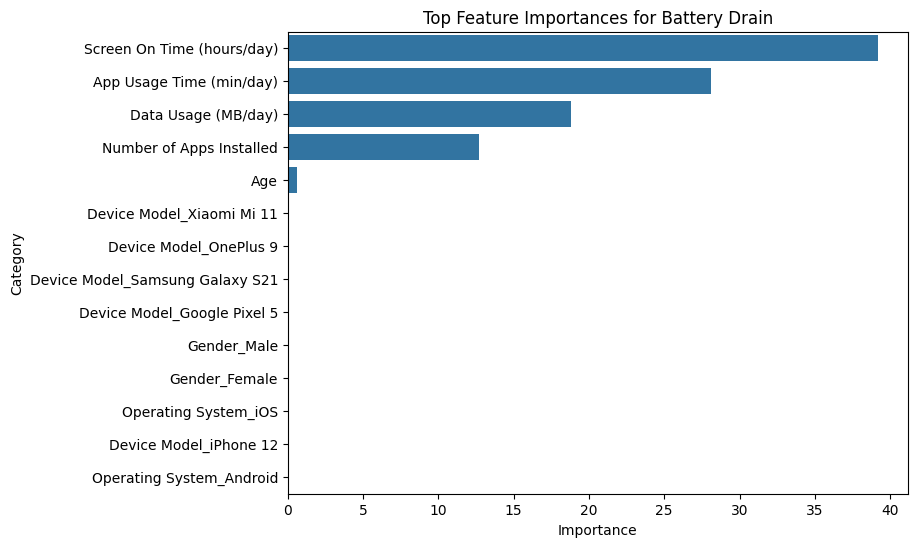

,0
Screen On Time (hours/day),39.214982
App Usage Time (min/day),28.136952
Data Usage (MB/day),18.829064
Number of Apps Installed,12.726133
Age,0.615701
Device Model_Xiaomi Mi 11,0.072423
Device Model_OnePlus 9,0.069966
Device Model_Samsung Galaxy S21,0.069887
Device Model_Google Pixel 5,0.069214
Gender_Male,0.055215


In [ ]:
#I defined the model as a pipeline hence taking the random forest stage and the preprocess phase from the pipeline
rf_model = model.named_steps["rf"]
pre = model.named_steps["preprocess"]

# Categorical feature names (after one-hot). Gives all the unique categories.
one_hot_encoder = pre.named_transformers_["cat"]
one_hot_encoder = one_hot_encoder.get_feature_names_out(categorical_features)

feature_names = np.concatenate([numeric_features, one_hot_encoder])

#Getting the importance of each feature as compared to original output column (battery drain)
importance_of_each_feature = rf_model.feature_importances_

#Converting the features to series so that we can plot it easily.
feat_imp = pd.Series(importance_of_each_feature * 100, index=feature_names).sort_values(ascending=False)

#Creating a figure to plot the values
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top Feature Importances for Battery Drain")
plt.xlabel("Importance")
plt.ylabel("Category")
plt.show()

#Showing the same without a plot and as a table
feat_imp.head(15)


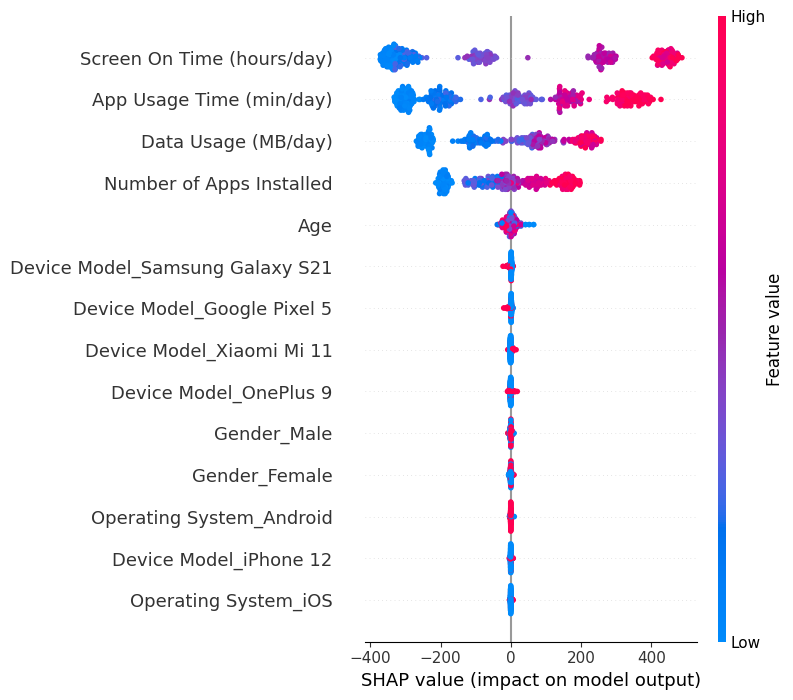

In [ ]:
# Taking a small sample of data (350 features) randomly to get the global importance summary (Shap is slow and few samples should be enough. Took almost 50 percent)
X_sample = X_train.sample(350, random_state=random_state)

# Preprocessing is happening same as data training using pipeline
X_sample_transformed = preprocessor.transform(X_sample)

#Instantiating SHAP explainer class and getting values from it
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_sample_transformed)

# Plotting SHAP values
shap.summary_plot(shap_values, X_sample_transformed, feature_names=feature_names)


'''
Regression using XGBoost
'''

In [ ]:
target_col = "Data Usage (MB/day)"

# One-hot encode any categorical columns
df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=[target_col, 'User Behavior Class', "User ID"])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n=== XGBoost Results ===")
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("RMSE:", rmse_xgb)
print("MAE:", mae_xgb)


=== XGBoost Results ===
RMSE: 158.04635519563556
MAE: 119.65047454833984


In [ ]:
# 1. Access feature importances from the retrained XGBoost model
feature_importances_updated = xgb_model.feature_importances_

# 2. Create a Pandas DataFrame
feature_names_updated = X_train.columns
df_feature_importances_updated = pd.DataFrame({
    'Feature': feature_names_updated,
    'Importance': feature_importances_updated
})

# 3. Sort the DataFrame by importance scores in descending order
df_feature_importances_updated = df_feature_importances_updated.sort_values(by='Importance', ascending=False)

print("Feature Importances from Updated XGBoost Model (Sorted):")
print(df_feature_importances_updated.head(10))

Feature Importances from Updated XGBoost Model (Sorted):
                            Feature  Importance
2           Battery Drain (mAh/day)    0.487248
3          Number of Apps Installed    0.219907
0          App Usage Time (min/day)    0.118666
1        Screen On Time (hours/day)    0.082856
5            Device Model_OnePlus 9    0.022458
4                               Age    0.013348
9              Operating System_iOS    0.013066
8            Device Model_iPhone 12    0.012637
6   Device Model_Samsung Galaxy S21    0.011850
10                      Gender_Male    0.010454


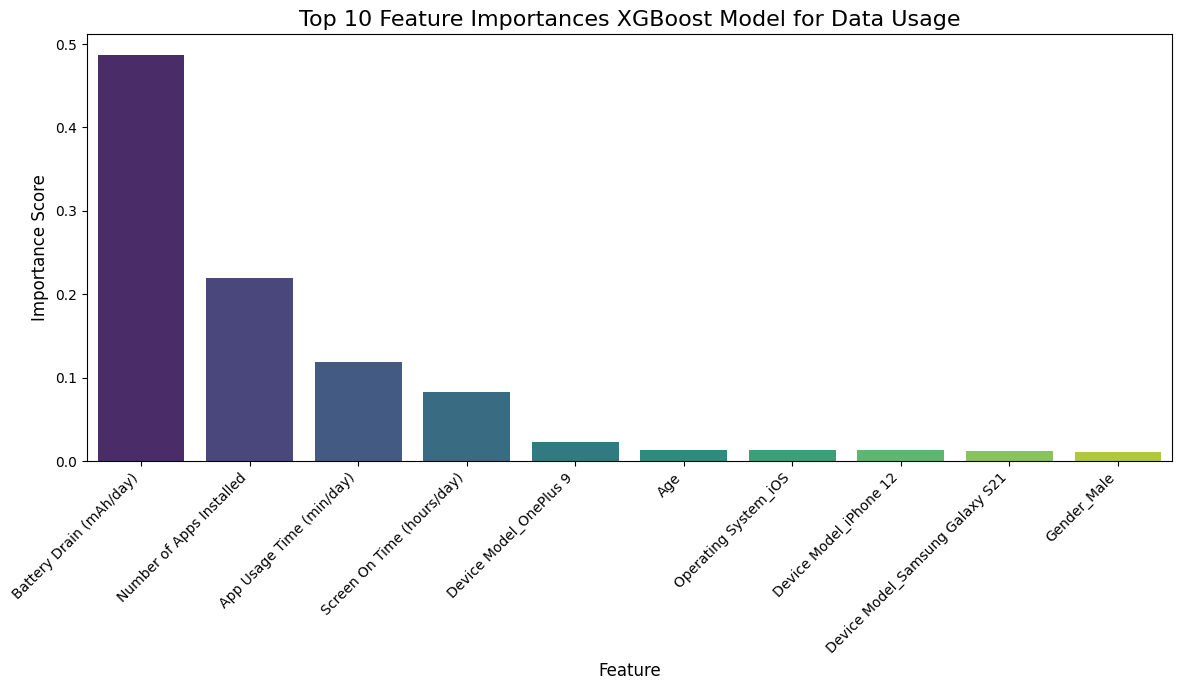

In [ ]:
# Select the top 10 most important features from the updated DataFrame
top_10_features_updated = df_feature_importances_updated.head(10)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Feature', y='Importance', hue='Feature', data=top_10_features_updated, palette='viridis', legend=False)

# Set title and labels
plt.title('Top 10 Feature Importances XGBoost Model for Data Usage', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure tight layout and display the plot
plt.tight_layout()
plt.show()